In [68]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator


In [51]:
# Convert data to DataFrame
df = pd.read_csv('Mall_Customers.csv')

In [52]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [53]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [54]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# K-Means Clustering with Elbow Method
silhouette_scores = []
inertia = []
k_range = range(2, 11)

In [73]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

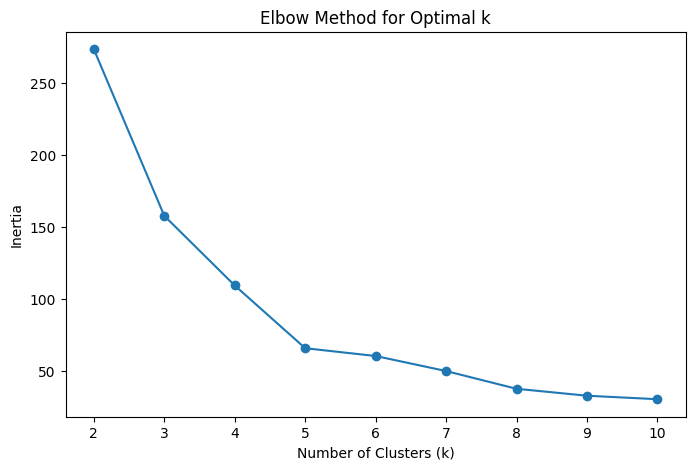

In [74]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [58]:
# Use kneed to find the optimal number of clusters
knee_locator = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

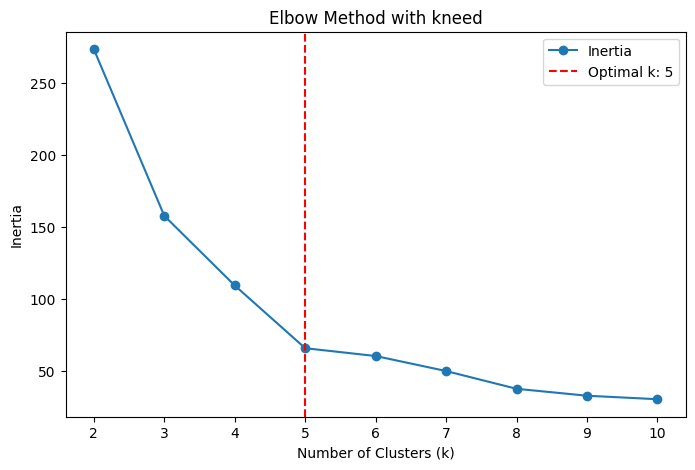

In [76]:
# Plot Elbow Method with the knee point
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k: {optimal_k}')
plt.title('Elbow Method with kneed')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

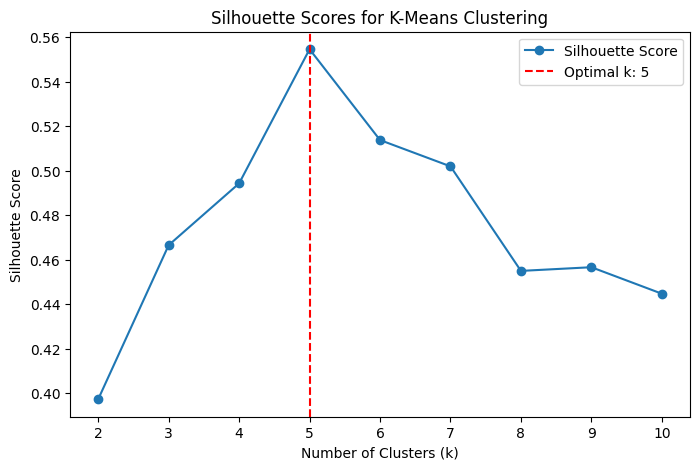

In [77]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k: {optimal_k}')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [79]:
# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [86]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Check if DBSCAN produced at least 2 clusters
unique_labels = set(dbscan_labels) - {-1}  # Exclude noise (-1)
if len(unique_labels) > 1:
    dbscan_silhouette_score = silhouette_score(X_scaled, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette_score:.2f}")
else:
    print("DBSCAN did not produce enough clusters for Silhouette Score calculation.")

Silhouette Score for DBSCAN: 0.35


In [87]:
# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
# Calculate Silhouette Score for GMM
if len(set(gmm_labels)) > 1:  # Ensure there are at least 2 clusters
    gmm_silhouette_score = silhouette_score(X_scaled, gmm_labels)
    print(f"Silhouette Score for GMM: {gmm_silhouette_score:.2f}")
else:
    print("GMM did not produce enough clusters for Silhouette Score calculation.")


Silhouette Score for GMM: 0.55


In [88]:
# Visualize the clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.colorbar()
    plt.show()

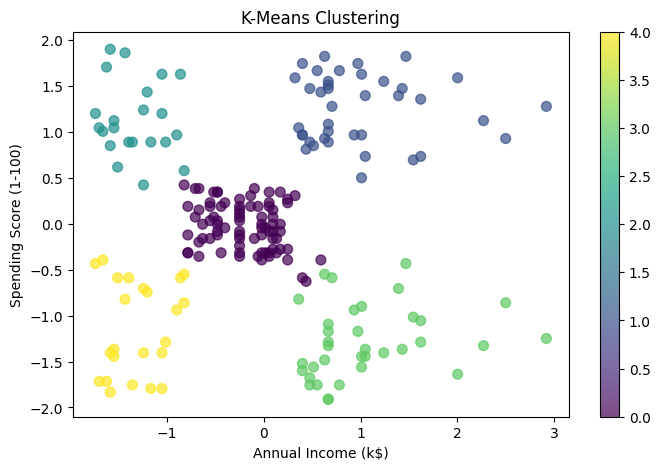

In [89]:
# Plot the clusters for each algorithm
plot_clusters(X_scaled, kmeans_labels, 'K-Means Clustering')

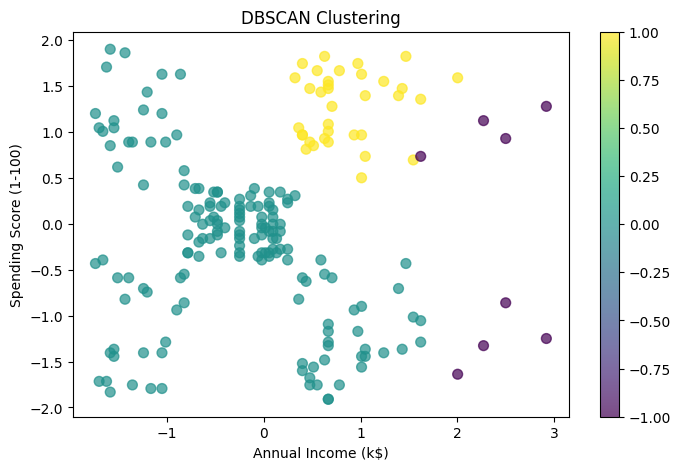

In [90]:
plot_clusters(X_scaled, dbscan_labels, 'DBSCAN Clustering')

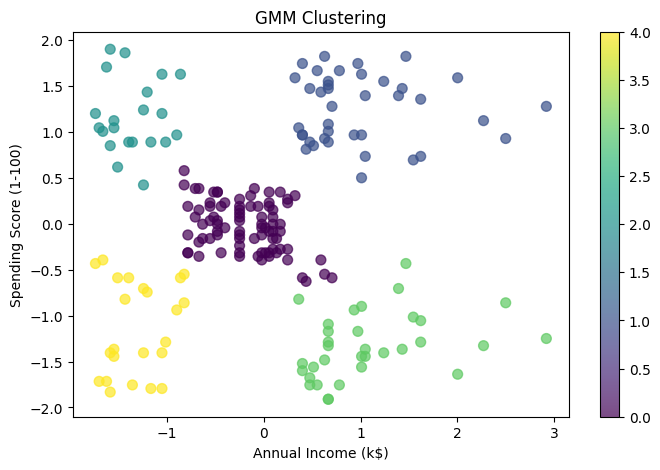

In [91]:
plot_clusters(X_scaled, gmm_labels, 'GMM Clustering')